A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.

#### Important terminology
* Root Node: This attribute is used for dividing the data into two or more sets. The feature attribute in this node is selected based on Attribute Selection Techniques.
* Branch or Sub-Tree: A part of the entire decision tree is called a branch or sub-tree.
* Splitting: Dividing a node into two or more sub-nodes based on if-else conditions.
* Decision Node: After splitting the sub-nodes into further sub-nodes, then it is called the decision node.
* Leaf or Terminal Node: This is the end of the decision tree where it cannot be split into further sub-nodes.
* Pruning: Removing a sub-node from the tree is called pruning.

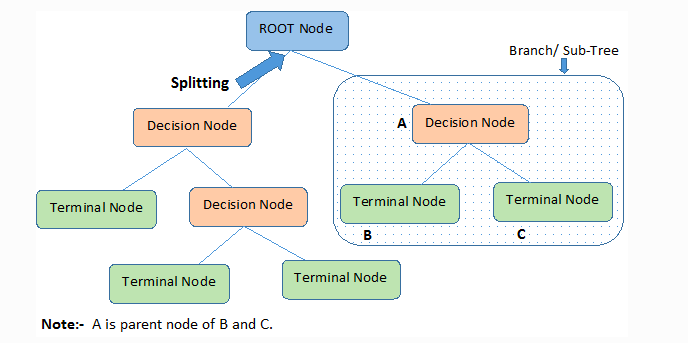

In [1]:
from IPython import display
display.Image("images/DT.png")

#### How Decision Trees works?

* The root node feature is selected based on the results from the Attribute Selection Measure(ASM).
* The ASM is repeated until a leaf node, or a terminal node cannot be split into sub-nodes.

#### What is Attribute Selection Measure?

Attribute Subset Selection Measure is a technique used in the data mining process for data reduction. The data reduction is necessary to make better analysis and prediction of the target variable.

The two main ASM techniques are

* Gini index
* Information Gain(ID3)

#### Gini Index

Gini index calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it is called pure. It means an attribute with a **lower Gini index should be preferred.** The degree of Gini Index varies between 0 and 1,

where,
* 0 denotes that all elements belong to a certain class or there exists only one class (pure)
* 1 denotes that the elements are randomly distributed across various classes (impure).
* 0.5 denotes equally distributed elements into some classes.

The larger the decrease Gini index, the more significant the variable is.

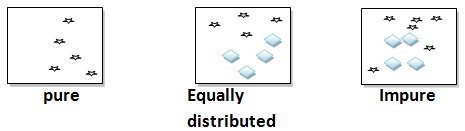

In [3]:
from IPython import display
display.Image("images/gini_nodes.png")

#### Information Gain: Entropy
Entropy is a way of quantifying the disorder of a system. In the case of nodes, disorder corresponds to impurity. If a node is pure, containing only observations of one class, its entropy is zero. On the contrary, if the frequency of each class is the same, the entropy value reaches the maximum value of 1.
We can **reduce the level of entropy** from the root node to the leaf node.


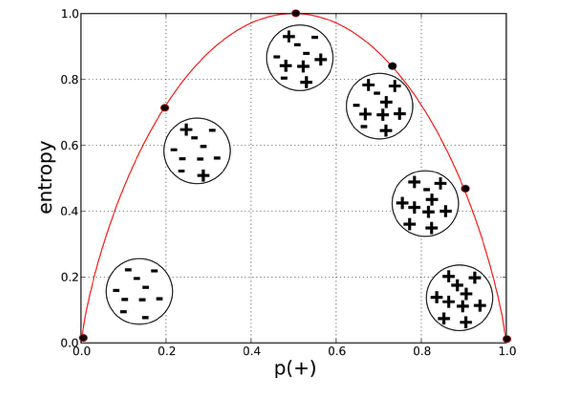

In [83]:
from IPython import display
display.Image("images/entropy.png")

#### Example

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('once')

### 1. Our data

#### Load data
Example synthetic dataset:

In [2]:
df = pd.read_csv('data/Simdata.dat', sep = "\t")

In [3]:
df.head(3)

,X1,X2,Y
0,-3.745291,NaN,NO
1,5.806532,-4.703332,YES
2,4.209833,-0.493488,YES


#### Create categorical variable

In [4]:
# Create categorical column
np.random.seed(444) 
categorical = np.random.choice(a=["A", "B", "C"],size=df.shape[0],p=[0.5, 0.3, 0.2])
df["X3"] = categorical

#### Encode target
For our ease, we will code the target variable.

In [5]:
df.replace({'Y': {"NO": 0, "YES": 1}}, inplace = True)

In [6]:
df.head(5)

,X1,X2,Y,X3
0,-3.745291,NaN,0,C
1,5.806532,-4.703332,1,C
2,4.209833,-0.493488,1,B
3,3.429156,-2.307669,0,B
4,-0.195014,2.680303,0,A


### 2. Split data intro train/test

#### Define feature and target matrix

In [7]:
features = list(df.columns)
target = 'Y'
features.remove(target)

In [8]:
X = df[features]
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)  

## 3. Training Machine Learning Models 

In the case of decision trees, 
 * there is no need to remove outliers 
 * there is to handle missing value
 * there is necessary to codify the categorical ones

In [10]:
# Preprocessing:
numerical_features = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numerical_transformer = Pipeline(
    steps = [
        ("missing_values", SimpleImputer(strategy="mean"))
    ])

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("missing_values", SimpleImputer(strategy="most_frequent"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough'
)

# Union preprocessing + classifier
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

It is important to know that the depth of the tree means that the deeper it is, the more complex it is and therefore, the greater the risk of overfitting.

In [11]:
param_grid = {
    "classifier__max_depth": [3,4,5,6,7,8,9,10],
}


In [12]:
search = GridSearchCV(clf, 
                      param_grid, 
                      n_jobs=1, 
                      verbose=4,
                      scoring = "roc_auc",
                      cv = 3,
                      return_train_score=True)

In [13]:
search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END classifier__max_depth=3;, score=(train=0.917, test=0.861) total time=   0.0s
[CV 2/3] END classifier__max_depth=3;, score=(train=0.909, test=0.881) total time=   0.0s
[CV 3/3] END classifier__max_depth=3;, score=(train=0.900, test=0.892) total time=   0.0s
[CV 1/3] END classifier__max_depth=4;, score=(train=0.959, test=0.885) total time=   0.0s
[CV 2/3] END classifier__max_depth=4;, score=(train=0.956, test=0.914) total time=   0.0s
[CV 3/3] END classifier__max_depth=4;, score=(train=0.951, test=0.916) total time=   0.0s
[CV 1/3] END classifier__max_depth=5;, score=(train=0.972, test=0.883) total time=   0.0s
[CV 2/3] END classifier__max_depth=5;, score=(train=0.969, test=0.917) total time=   0.0s
[CV 3/3] END classifier__max_depth=5;, score=(train=0.976, test=0.902) total time=   0.0s
[CV 1/3] END classifier__max_depth=6;, score=(train=0.986, test=0.888) total time=   0.0s
[CV 2/3] END classifier__max_depth=6;, s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('missing_values',
                                                                                          SimpleImputer())]),
                                                                         ['X1',
                                                                          'X2']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('missing_values',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['X3'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc', verbose=4)

#### Best model

In [14]:
# best model
best_model = search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('missing_values',
                                                                   SimpleImputer())]),
                                                  ['X1', 'X2']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('missing_values',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['X3'])])),
                ('classifier', DecisionTreeClassifier(max_depth=4))])

#### Tree

In [15]:
# get feature encoder names
search.best_estimator_.steps[0][1].named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)

array(['X3_A', 'X3_B', 'X3_C'], dtype=object)

In [16]:
# get all features names
preprocessor = search.best_estimator_.steps[0][1]
categorical_features_transformed = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
labels = np.concatenate([numerical_features, categorical_features_transformed])

In [17]:
labels

array(['X1', 'X2', 'X3_A', 'X3_B', 'X3_C'], dtype=object)

Tree depth: 4
Number of terminal nodes: 4


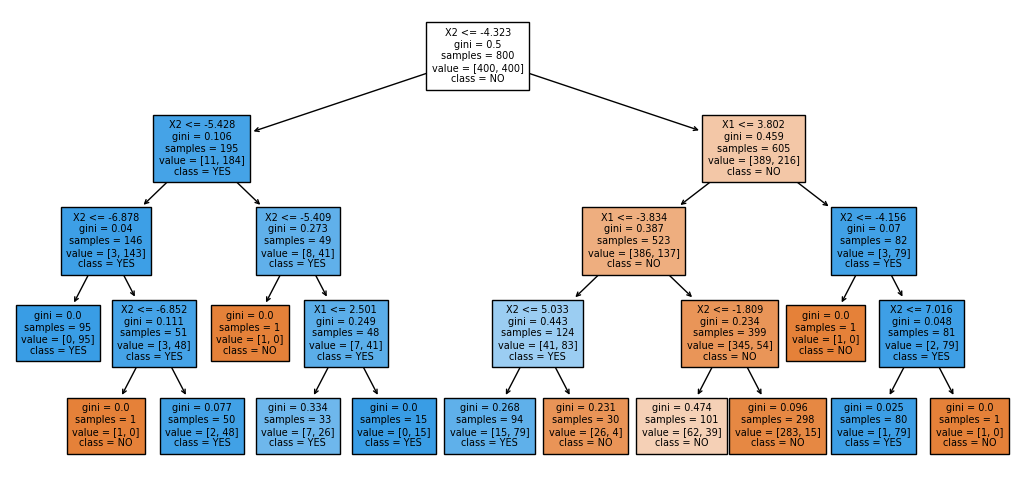

In [28]:
# Structure of the created tree
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Tree depth: {search.best_estimator_._final_estimator.get_depth()}")
print(f"Number of terminal nodes: {search.best_estimator_._final_estimator.get_depth()}")

plot = plot_tree(
            decision_tree = search.best_estimator_._final_estimator,
            feature_names = labels.tolist(),
            class_names   = ["NO","YES"],
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

#### Overfitting

In [29]:
cv_results = pd.DataFrame(search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012186,0.001430,0.008081,0.002756,3,{'classifier__max_depth': 3},0.860594,0.880990,0.892249,0.877944,0.013102,5,0.917335,0.909211,0.900034,0.908860,0.007068
1,0.007760,0.000095,0.004691,0.000729,4,{'classifier__max_depth': 4},0.885254,0.913646,0.916276,0.905059,0.014045,1,0.959020,0.955978,0.950806,0.955268,0.003391
2,0.006988,0.000292,0.004042,0.000091,5,{'classifier__max_depth': 5},0.882757,0.916704,0.901690,0.900384,0.013889,2,0.972431,0.968770,0.976434,0.972545,0.003130
3,0.008582,0.001446,0.006104,0.001379,6,{'classifier__max_depth': 6},0.887976,0.920463,0.892362,0.900267,0.014393,3,0.985892,0.981724,0.983995,0.983870,0.001704
4,0.006404,0.000294,0.003728,0.000149,7,{'classifier__max_depth': 7},0.866794,0.887779,0.886851,0.880475,0.009681,4,0.993488,0.989222,0.993561,0.992090,0.002029
5,0.006379,0.000146,0.003661,0.000131,8,{'classifier__max_depth': 8},0.865335,0.870189,0.884420,0.873314,0.008099,6,0.998022,0.994051,0.997202,0.996425,0.001712
6,0.006125,0.000008,0.003567,0.000019,9,{'classifier__max_depth': 9},0.842947,0.868617,0.885635,0.865733,0.017546,7,0.999521,0.997705,0.999236,0.998821,0.000797
7,0.006918,0.000488,0.004652,0.000492,10,{'classifier__max_depth': 10},0.844237,0.845500,0.885098,0.858278,0.018971,8,0.999930,0.999754,0.999621,0.999768,0.000126


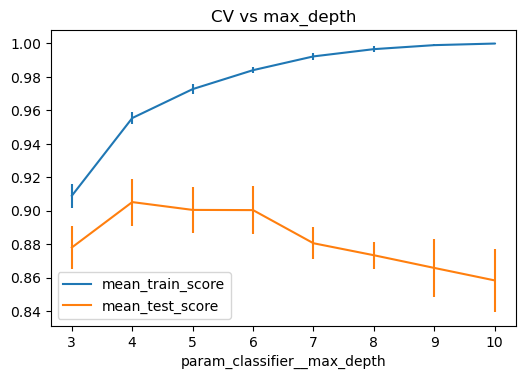

In [31]:
fig, ax = plt.subplots(figsize=(6, 3.84))
cv_results.plot(x='param_classifier__max_depth', y='mean_train_score', yerr='std_train_score', ax=ax)
cv_results.plot(x='param_classifier__max_depth', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("CV vs max_depth");


It is observed that the greater the depth the tree tends to overfit.

#### Feature Importance

The importance of each predictor in the model is calculated as the total (normalized) reduction in the division criterion, in this case the Gini index, that the predictor achieves in the divisions in which it participates. If a predictor has not been selected in any division, it has not been included in the model and therefore its importance is 0.

In [32]:
print("Feature importance")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'feature': labels.tolist(),
                             'importance': search.best_estimator_._final_estimator.feature_importances_}
                            )
importancia_predictores.sort_values('importance', ascending=False)

Feature importance
-------------------------------------------


,feature,importance
1,X2,0.546157
0,X1,0.453843
2,X3_A,0.000000
3,X3_B,0.000000
4,X3_C,0.000000
